In [ ]:
!wget https://raw.githubusercontent.com/beangoben/workshop_template/master/colab_utils.py -O colab_utils.py
!rm -rf sample_data
import colab_utils

github_repo = 'https://github.com/ajinich/tcj_2021_data'
colab_utils.clone_repo(github_repo)

# En este cuaderno de Python vamos a practicar un poco los "log(fold-changes)" (i.e. lfc) y los Z-scores


Pueque esto parezca un poco abstracto (o que te haga pensar, "por qué estamos haciendo esto?") al principio.

Pero recuerda que los datos que vamos a estar trabajando mañana expresan el efecto de las distintas moleculas/compuestos en términos de: 

"log(fold-changes)" del crecimiento de las bacterias mutantes en presencia de compuestos químicas respecto a las bacterias en medio de cultivo sin ningun "drug compound"


### Comenzamos importando unas librerias. 


In [19]:

import matplotlib.pyplot as plt # libreria de Python para hacer graficas. 
from IPython.display import Image

### [EJERCICIO]: 
# import dos librerias mas: 
# numpy (para cálculo numérico) --> llamala np
# pandas (para analisis de datos con "dataframes") --> llamala pd



###

# Parte 1: log(fold-changes)

### EJEMPLO 1: Diez estudiantes del TCJ 2025 contaron cuantas sentadillas podian hacer el 1er de enero (2025) y cuantas podian hacer el 1ero de Mayo (2025)

En la celda de abajo (ya llenada) vamos a guardar lo datos en el formato arreglos ("arrays") de la liberia numpy (aqui llamada np). 

Piensa en los arrays como vectores (o simplemente listas de numeros, que puedes manipular con calculo numerico)

In [ ]:
# numero de sentadillas el 1ero de enero
num_enero = np.array([5, 2, 9, 4, 6, 8, 1, 5, 6, 12])

# numero de sentadillas el 1ero de Mayo
num_mayo = np.array([10, 8, 4.5, 32, 6, 12, 1, 50, 1, 14])

### Cual es el *fold-change* para cada estudiante? 

En Python puedes hacer aritmetica con numeros (e.g. 4/2 = 2)

Pero tambien puedes hacer manipulaciones de arreglos.

Divide los datos de Mayo entre los datos de Enero para sacar la tasa de cambio ("fold-change")

In [ ]:
### [EJERCICIO]: 
# Crea una variable llamada fc que contenga 
# el cociente de los datos de Mayo entre los datos de Enero, 
# i.e. la tasa de cambio ("fold-change") 
# Despues imprime tu resultado (fc)



###

### Cual es el *fold-change* para cada estudiante en escala logaritmica (base 2)? 

In [ ]:
### [EJERCICIO]: 
# Usa la funcion log2() de numpy (np)
# para calcular el logaritmo base-2 de fc 
# Guarda el resultado en una variable (puedes llamarla l2fc)
# Imprime l2fc



###

## Ejemplo 2: 
### En su articulo en la revista Nature, Johnson et al. midieron: 

1. cuantas bacterias crecieron en el medio de cultivo "normal" (sin ningún antibiótico) i.e. condición control
2. cuantas bacterias crecieron en el medio de cultivo + 10 distintos antibioticos:

In [2]:
# Num. de bacterias en la condicion control
bacterias_control = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

# Num. de bacterias cuando se agrega un antibiotico 
# i.e. 10 antibioticos distintos, se agrega uno a la vez.  
bacterias_abx = np.array([30, 100, 50, 10, 99, 30, 30, 25, 12.5, 1])

1. Cual es el *fold-change* en el numero de bacterias que crecieron en cada condicion? 

In [ ]:
### [EJERCICIO]: 
# crea una variable fc que contenga
# el cociente de numero de bacterias que crecieron con antibiotico 
# entre el numero de bacterias que crecieron sin antibiotico 
# imprime tu resultado


###


2. Cual es el *fold-change* en escala logaritmica base-2 en el numero de bacterias que crecieron en cada condicion? 

In [ ]:
### [EJERCICIO]: 
# usa la funcion np.log2() para calcular el logaritmo base-2 
# del fold-change (fc) que calculaste arriva. 
# imprime tu resultado

###

# Z-scores: 

En los datos de Johnson et al. que vamos a usar mañana, hay una columna de datos llamada "Z-scores". 

Lo que quiero es que mañana que veamos los datos reales, sea menos misteriosa la columna Z-score

El objetivo de este ejercicio es para entender cómo se calcula el Z-score de un vector de datos.

Y tambien es una buena excusa para seguir practicando programacion en Python. 

Primero vamos a generar un vector de datos con una distribución "normal", 
Con promedio / media = 35 
Y desviación estándar = 15

Si necesitas recordar que es la media y la desviación estándar, va esta imagen:
 


In [ ]:
# corre este comando: 
Image('./mean_std.jpg')

In [7]:
### [EJERCICIO]
# usa la funcion np.random.normal()
# para generar 400 valores con media 35 y desviacion std 15
# guarda los datos en una variable llamada valores_1


###

### Como graficar un histograma en Python:


In [ ]:
plt.figure(figsize = (8, 6))

### [EJERCICIO]
# Usa la funcion plt.hist() para hacer un 
# histograma de los valores que generaste

###

# Aca estoy inventando lo que son los datos. 
# Pero siempre hay que etiquetar nuestros ejes-X y ejes-Y
plt.xlabel('peso molecular', fontsize = 16)
plt.ylabel('numero de moleculas\ncon ese peso molecular', fontsize = 16)

## Ahora vamos a "transformar" o "normalizar" los datos  a "Z-scores" haciendo dos cosas: 

1. A cada dato le vamos a restar la media de todos los datos
2. Vamos a dividir todo entre la desviacion estandar de los datos. 



In [13]:
### [EJERCICIO]
# 1. usa la funcion np.mean() para calcular la media de  valores_1
# guarda el valor en una variable llamada media


# 2. usa la funcion np.std() para calcular la desv. estandar de valores_1
# guarda el valor en una variable llamada std


###

Z_scores = (valores_1 - media) / std 

Y ahora vamos a graficar el histograma de los valores Z. 
Como se compara con el histograma de los valores originales? 


Text(0, 0.5, 'numero de datos con ese Z-score')

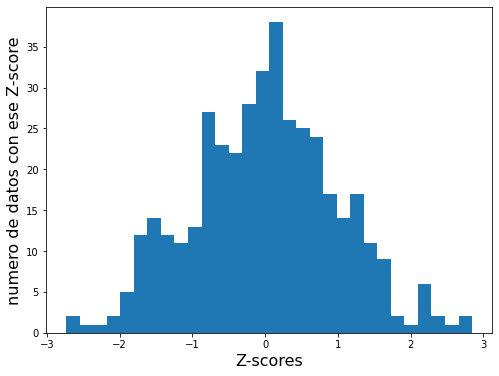

In [15]:
plt.figure(figsize = (8, 6))

plt.hist(Z_scores, 30)
plt.xlabel('Z-scores', fontsize = 16)
plt.ylabel('numero de datos con ese Z-score', fontsize = 16)

## EXTRA: Vamos a ordernar un poquito más nuestros datos, poniendolos en formato "dataframe" de la libería Pandas. 

In [20]:
# Vamos a trabajar mucho con el formato "dataframes" de Pandas
# Hay que agarrar practica usandolas
df = pd.DataFrame()
df['valores_1'] = valores_1
df['Z-scores'] = Z_scores

In [21]:
df

,valores_1,Z-scores
0,57.645082,1.445870
1,10.175790,-1.501838
2,68.888474,2.144052
3,59.139151,1.538647
4,17.594801,-1.041139
...,...,...
395,32.335806,-0.125765
396,54.758300,1.266609
397,-6.568266,-2.541597
398,35.498712,0.070643


# Ejercicio Z-scores: 

En el 2020, el año de la pandemia, Juanito comió hamburguesas con papas a la francesa **TODOS** los dias. 

Cada dia Juanito apuntó en su diario el número de papas se comió ese dia. 


Estos son los datos de Juanito

In [ ]:
papas_2020 = np.random.normal(400, 30, 365)
papas_2020 = [int(p) for p in papas_2020] # Esto es un pequ~o truco para convertir a numeros enteros. No importante ahora. 

1. Grafica el histograma (la distribucion) del numero de papas que comio Juanito en 2020: 

2. Cuantas papas comio en promedio cada dia en 2020? Cual es la desviacion estandar de esta distribucion? 

3. Convierte estos datos a un "z-score" (es decir, normaliza los datos de Juanito!)

4. Guarda estos datos (papas_2020 y los datos normalizados / el z-score) en un "pandas dataframe"